In [2]:
import pandas as pd
import numpy as np 
import networkx as nx
import matplotlib.pyplot as plt
from networkx.algorithms import bipartite
import seaborn as sns
from github import Github  # Pygithub
import pickle
from collections import Counter


In [3]:
# anonymous gitlab instance, read-only for public resources
code_github = "Your code Github for collecting data"
g = Github(code_github)
Topics = ['machine learning','data science','ai','sna','big data','deep learning','nlp','computer vision']
ML_repo_committers = dict()

In [ ]:
for repo in g.get_user().get_repos():
    print(repo.name)

In [ ]:
for topic in Topics:
    repositories = g.search_repositories(query = topic)
    topic = list(repositories)
    for repo in topic:
        contributors = list(repo.get_contributors())
        if len(contributors) >=2:
            contributors = [c.location for c in contributors]
            repo_committers[ML_repo.full_name] = [contributors,ML_repo.description,ML_repo.stargazers_count,
                                ML_repo.forks_count,ML_repo.language,ML_repo.created_at]

In [ ]:
len(repo_committers)

In [ ]:
#geolocator = Nominatim()
#loc = geolocator.geocode(city)


In [188]:
f = open("file1.pkl","wb")
pickle.dump(ML_repo_committers,f)
f.close()


In [3]:
pickle_in = open("file1.pkl","rb")
ddict = pickle.load(pickle_in)
repo_committers = ddict
len(ddict)


2084

Repositories programming language 

In [3]:

#dict(sorted(langg.items(), key=lambda x: x[1], reverse=True))

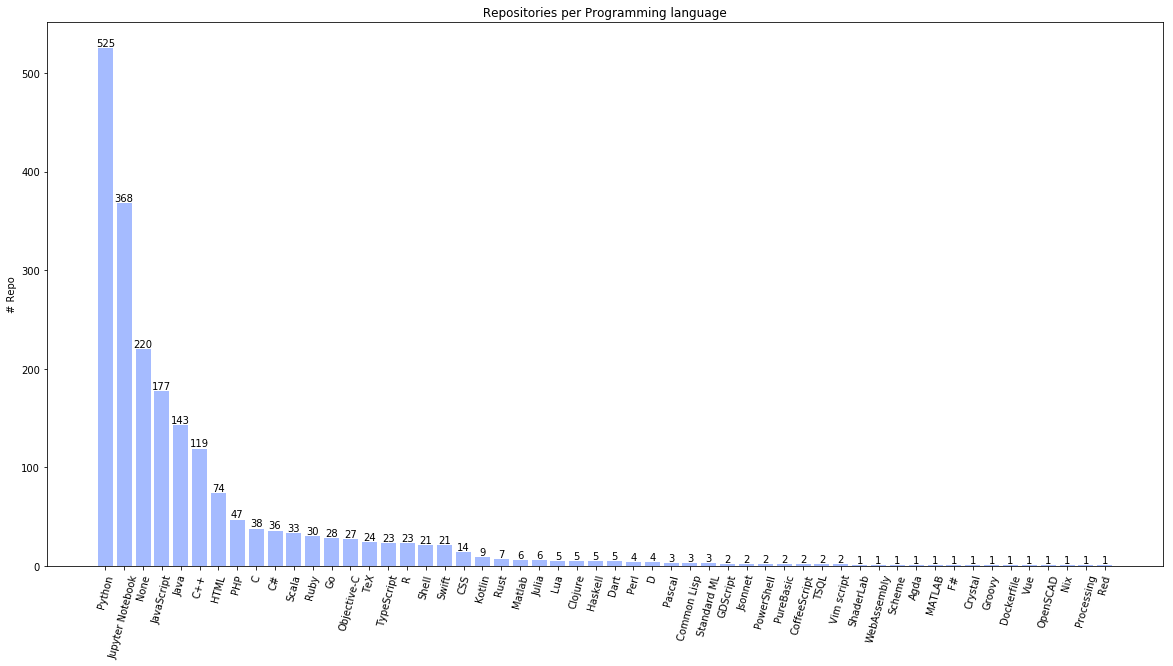

In [6]:
lang = []
for k in ddict.keys() : 
    lang.append(ddict[k][4])
langg = Counter(lang)
langg['None']=langg[None]
del langg[None]
plt.figure(figsize=(20,10))
langg = dict(sorted(langg.items(), key=lambda x: x[1], reverse=True))
X =langg.keys()
Y =langg.values()
y_pos = np.arange(len(X))
bar1 = plt.bar(y_pos, Y, align='center', alpha=0.5,color = "#4d79ff")
plt.xticks(y_pos, X,rotation=75)
plt.ylabel('# Repo')
plt.title(' Repositories per Programming language ')
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')

plt.savefig('repoLang.png')
plt.show()


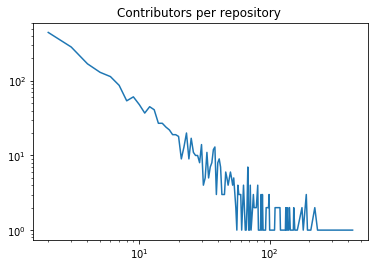

In [7]:

degs = {}
for k in ddict.keys() :
    deg =len(ddict[k][0])
    if deg not in degs :
        degs [ deg ] = 0
    degs [ deg ] += 1
items = sorted ( degs.items())
fig = plt.figure()
ax = fig.add_subplot (111)
ax.plot ([ k for (k , v ) in items ] , [ v for (k ,v ) in items ])
ax.set_xscale('log')
ax.set_yscale('log')
plt.title("Contributors per repository " )
plt.savefig('contNEtDist.PNG')



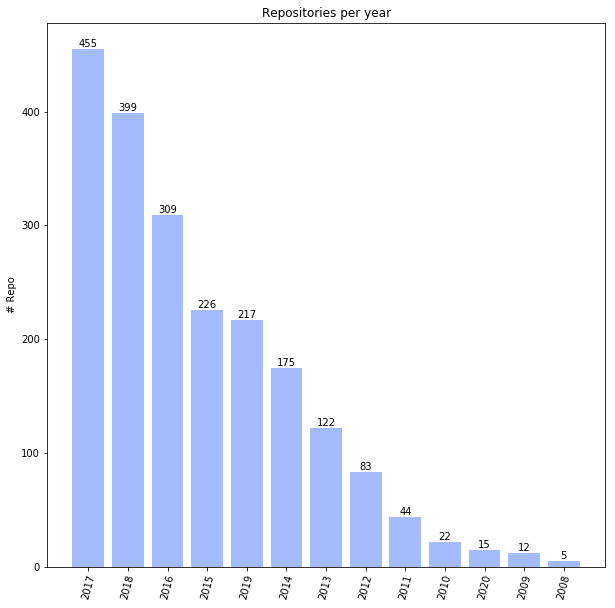

In [8]:
year = []
for k in ddict.keys():
    year.append(ddict[k][5].year)

year = Counter(year)
year = dict(sorted(year.items(), key=lambda x: x[1], reverse=True))

plt.figure(figsize=(10,10))
X =year.keys()
Y =year.values()
y_pos = np.arange(len(X))
bar1 = plt.bar(y_pos, Y, align='center', alpha=0.5,color = "#4d79ff")
plt.xticks(y_pos, X,rotation=75)
plt.ylabel('# Repo')
plt.title('Repositories per year')
for rect in bar1:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width()/2.0, height, '%d' % int(height), ha='center', va='bottom')
    
    
plt.savefig('repoYear.png')
plt.show()
pd.DataFrame(year.keys(),year.values()).to_csv('C:/Users/asus/Desktop/4/comNN.csv')

2380.803640905718

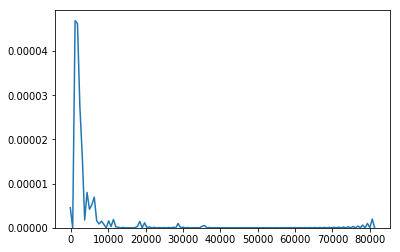

In [9]:
forks = []
for k in ddict.keys() : 
    forks.append(ddict[k][3])
sns.distplot(forks,hist=False)
np.std(forks)

5056.713104787527

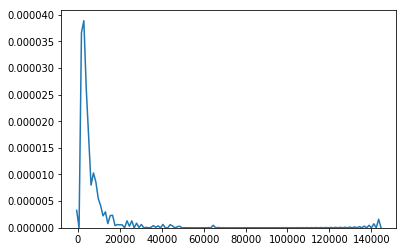

In [10]:

stars = []
for k in ddict.keys() : 
    stars.append(ddict[k][2])
sns.distplot(stars,hist=False)
plt.savefig("stars.PNG")


np.std(stars)

In [11]:
def nx_graph_from_biadjacency_pandas_df(dic):
    B = nx.Graph()
    for key in dic.keys():
        B.add_node(key, bipartite=0)
        for value in dic[key][0] :
                B.add_node(value, bipartite=1)
                B.add_edge(key, value)
    return B

In [12]:
B = nx_graph_from_biadjacency_pandas_df(ddict)


In [13]:
top_nodes = {n for n, d in B.nodes(data=True) if d['bipartite']==0}
top_nodes
bottom_nodes = set(B) - top_nodes
G_repo = bipartite.projected_graph(B,top_nodes)
G_user =  bipartite.projected_graph(B,bottom_nodes)

In [18]:
print(nx.info(G_user))
nx.average_clustering(G_user)

Name: 
Type: Graph
Number of nodes: 33580
Number of edges: 2362146
Average degree: 140.6877


0.9436487198974917

In [17]:
print(nx.info(G_user))
print("Density : ",nx.density(G_user))
print("Assortavity : ",nx.degree_assortativity_coefficient(G_repo))
print("Average Clustering : ",nx.average_clustering(G_repo))
components = nx.connected_components(G_repo)
largest_component = max(components, key = len)
print("the lenght  :", len(largest_component))


Name: 
Type: Graph
Number of nodes: 33580
Number of edges: 2362146
Average degree: 140.6877
Density :  0.0041897516671990445
Assortavity :  0.42810119769211574
Average Clustering :  0.3615813148930709
the lenght  : 1394


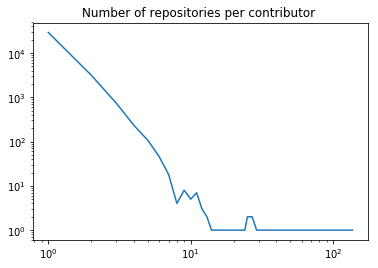

In [70]:
def plot_degree_distribution(G,typ='contributor') :
    degs = {}
    for n in G.nodes() :
        deg = G.degree(n)
        if deg not in degs :
            degs [ deg ] = 0
        degs [ deg ] += 1
    items = sorted ( degs.items())
    fig = plt.figure()
    ax = fig.add_subplot (111)
    ax.plot ([ k for (k , v ) in items ] , [ v for (k ,v ) in items ])
    ax.set_xscale('log')
    ax.set_yscale('log')
    plt.title(" Github "+ typ + " Degree Distribution " )
    plt.savefig('contNEtDist.PNG')

degs = {}
nodes = list(bottom_nodes)
for n in nodes :
    deg = B.degree(n)
    if deg not in degs :
        degs [ deg ] = 0
    degs [ deg ] += 1
items = sorted ( degs.items())
fig = plt.figure()
ax = fig.add_subplot (111)
ax.plot ([ k for (k , v ) in items ] , [ v for (k ,v ) in items ])
ax.set_xscale('log')
ax.set_yscale('log')
plt.title("Number of repositories per contributor " )
plt.savefig('contNEtDist.PNG')

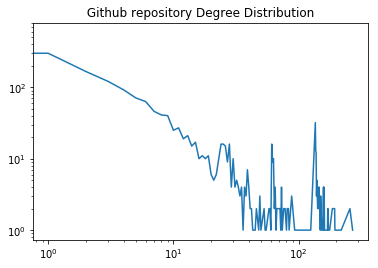

In [32]:
plot_degree_distribution(G_repo,"repository")

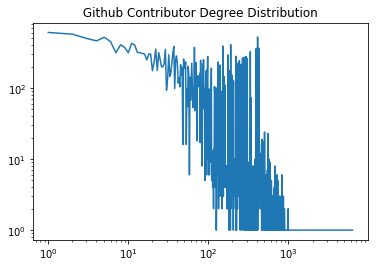

In [33]:
plot_degree_distribution(G_user, "Contributor")

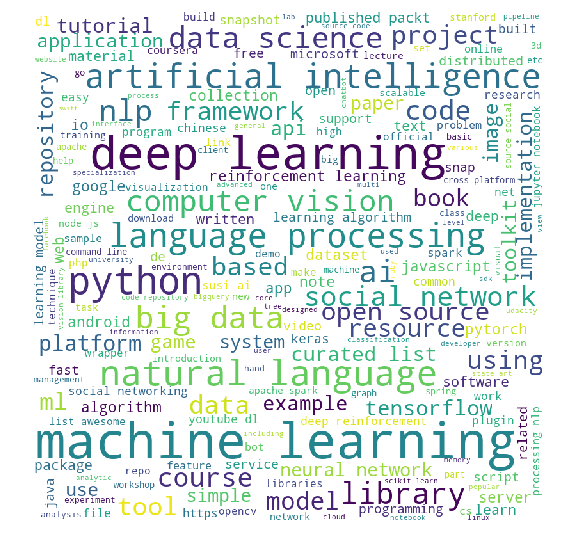

In [34]:
from wordcloud import WordCloud, STOPWORDS 
import matplotlib.pyplot as plt 
import pandas as pd 
  
# Reads 
  
comment_words = ' '
stopwords = set(STOPWORDS) 
  

for k in ddict.keys(): 
      
    # typecaste each val to string 
    val = str(ddict[k][1]) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
          
    for words in tokens: 
        comment_words = comment_words + words + ' '
  
  
wordcloud = WordCloud(width = 800, height = 800, 
                background_color ='white', 
                stopwords = stopwords, 
                min_font_size = 10).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (8, 8), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 2) 
plt.savefig("wordCount.PNG")
plt.show()

In [35]:
bipartite.biadjacency_matrix(B,G_repo)

<2084x33580 sparse matrix of type '<class 'numpy.int32'>'
	with 40423 stored elements in Compressed Sparse Row format>

C:\Users\asus\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


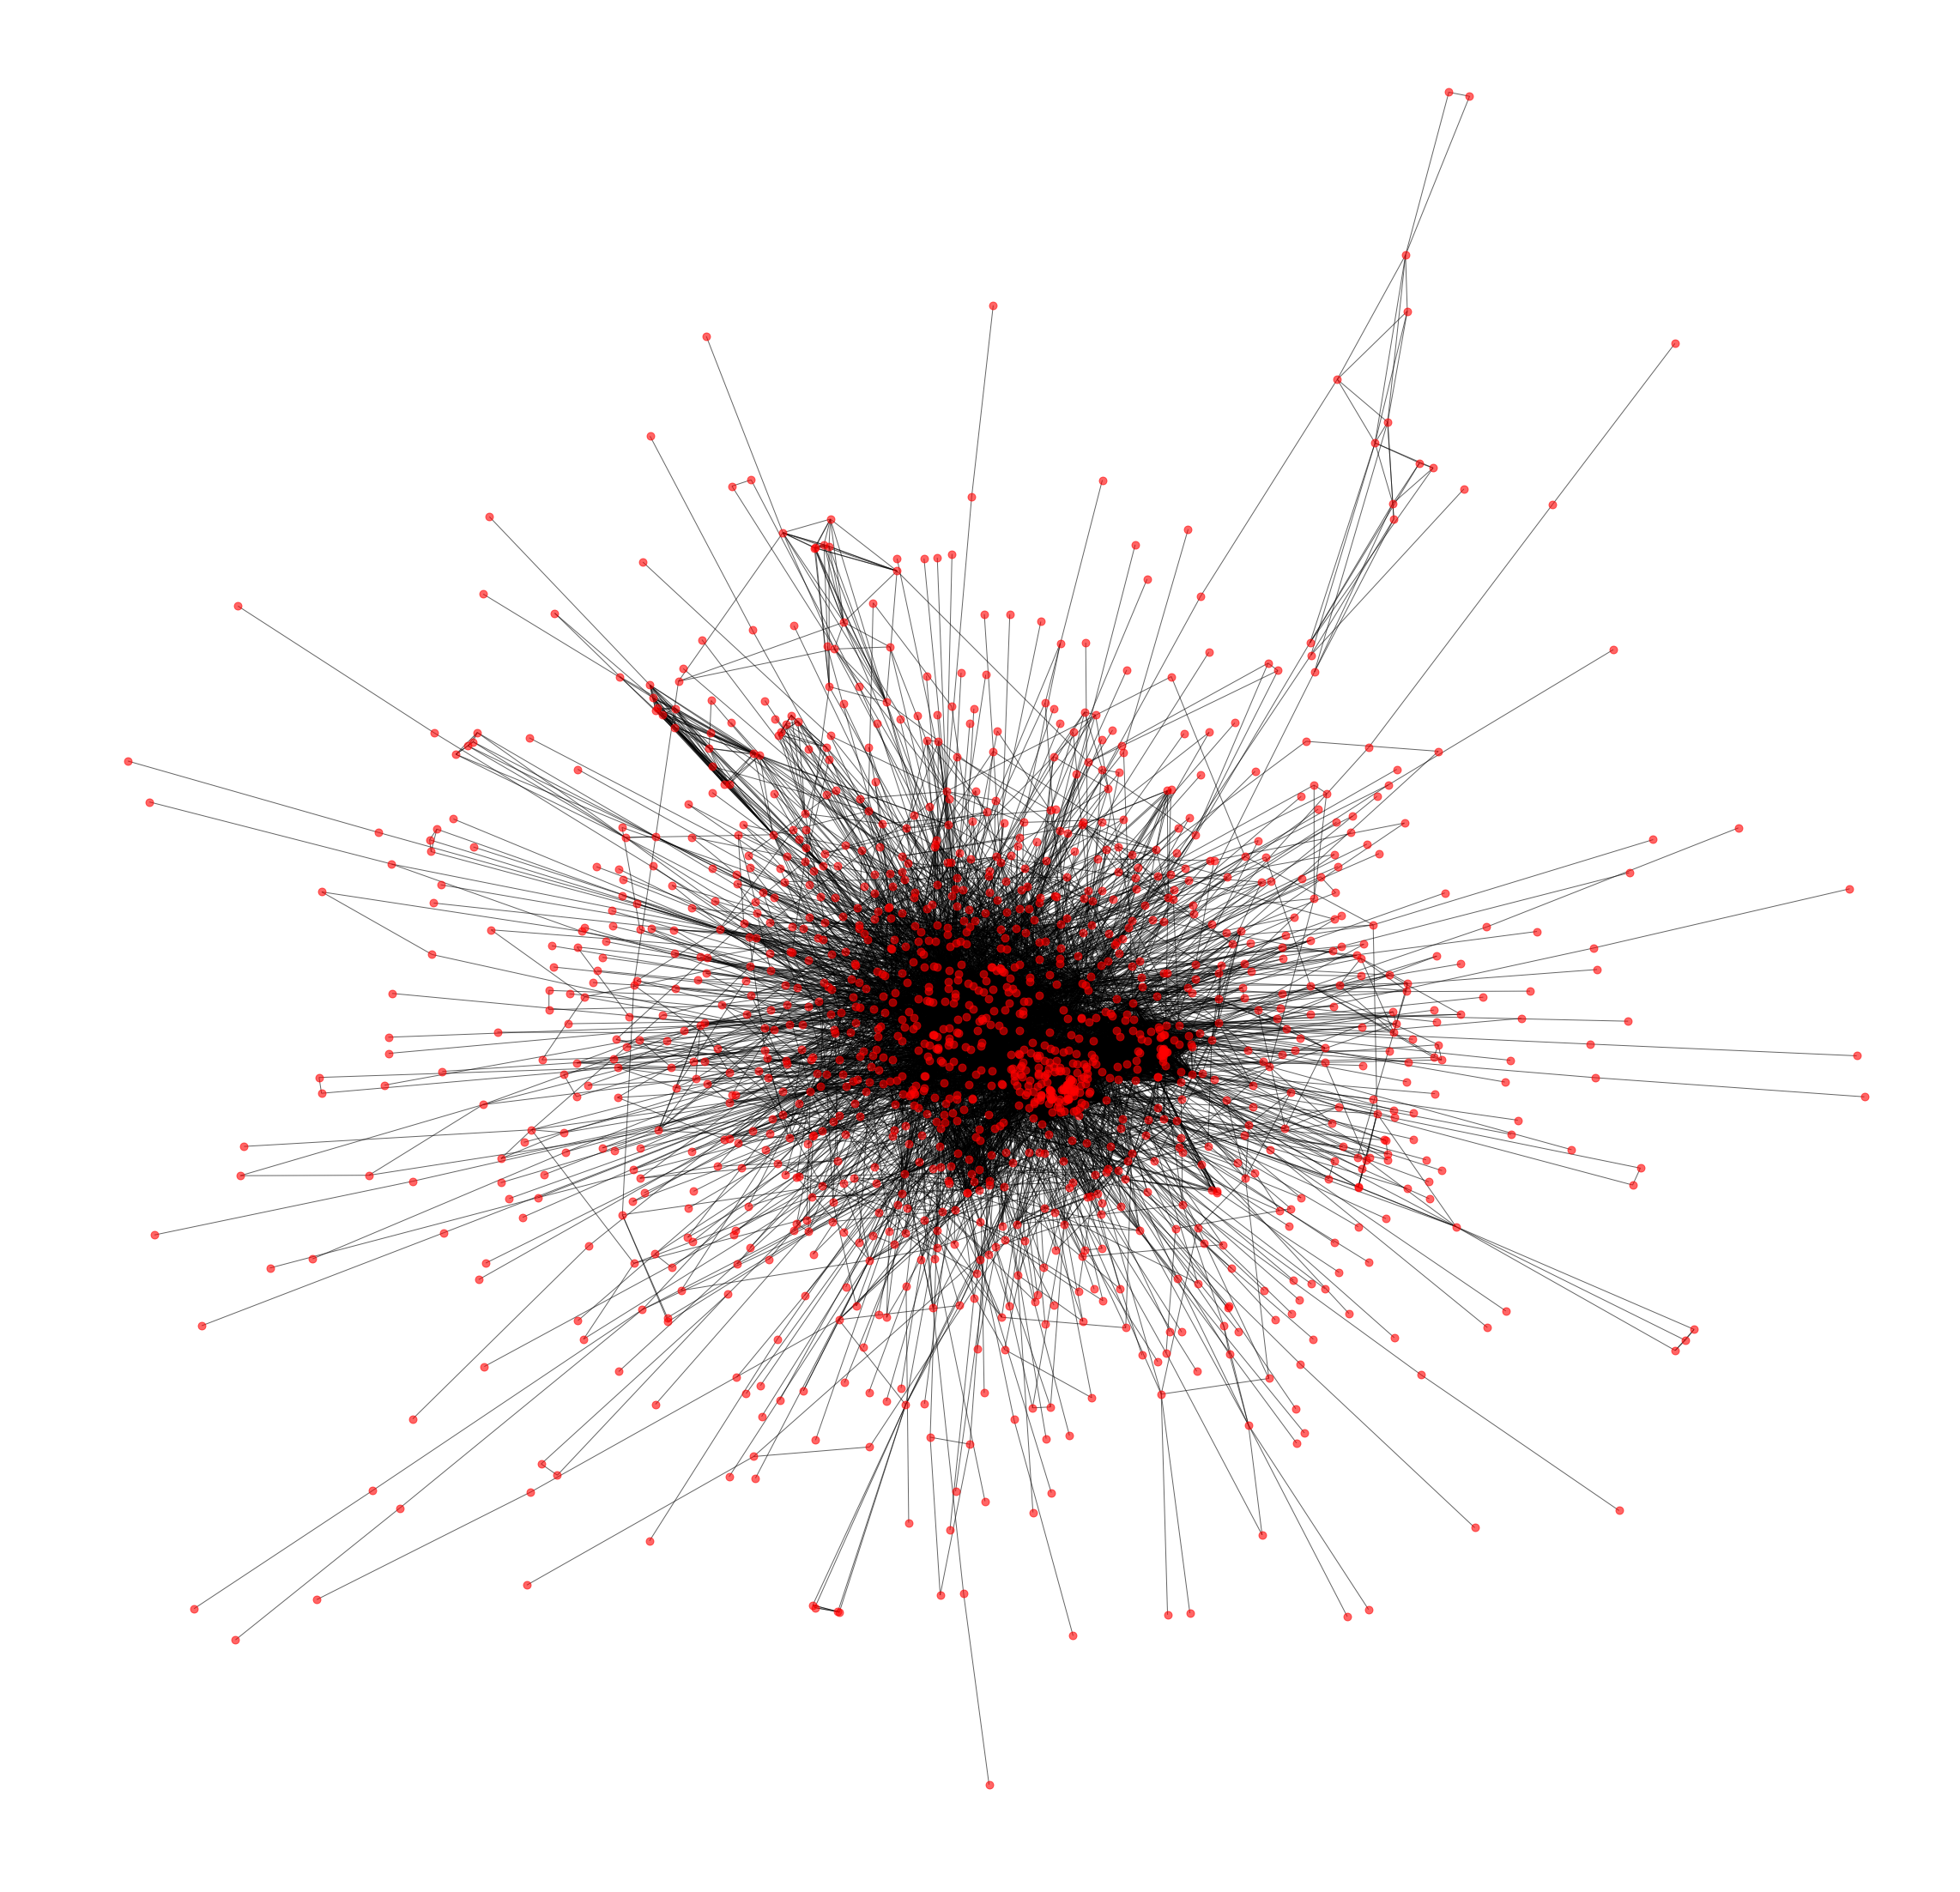

In [39]:
subgraph = G_repo.subgraph(largest_component)
d = nx.degree(subgraph)
plt.figure(figsize = (40, 40))
layout = nx.spring_layout(subgraph)
nx.draw_networkx(subgraph, layout,node_size = 80,with_labels=False,alpha= 0.6)
plt.axis('off')
plt.savefig('user_graph.png')
plt.show()

In [31]:
# Network Info
print(nx.info(G_user))
print("Density : ",nx.density(G_user))
print("Connected : ",nx.is_connected(G_user))
print("Average Clustering : ", nx.average_clustering(G_user))


Name: 
Type: Graph
Number of nodes: 20766
Number of edges: 1402895
Average degree: 135.1146
Density :  0.006506843747694693
Connected :  False
Average Clustering :  0.9462820502166922


In [138]:
components = nx.connected_components(G_user)
largest_component = max(components, key = len)
print("the lenght of the largest component in the graph is :", len(largest_component))

the lenght of the largest component in the graph is : 30014


C:\Users\asus\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


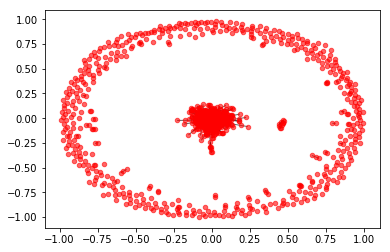

In [37]:
subgraph = G_repo.subgraph(largest_component)
layout = nx.spring_layout(G_repo)
nx.draw_networkx(G_repo, layout,node_size = 20 ,with_labels=False,alpha= 0.6)

In [250]:

print(nx.info(G_user))
print("Density : ",nx.density(G_user))
print("Assortavity : ",nx.degree_assortativity_coefficient(G_user))
print("Average Clustering : ",nx.average_clustering(G_user))
components = nx.connected_components(G_user)
largest_component = max(components, key = len)
print("the lenght  :", len(largest_component))

Name: 
Type: Graph
Number of nodes: 1259
Number of edges: 7128
Average degree:  11.3233
Density :  0.009001011477299849
Assortavity :  0.3307250974503747
Average Clustering :  0.34496934358304393
the lenght  : 758


C:\Users\asus\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


<Figure size 21600x21600 with 0 Axes>

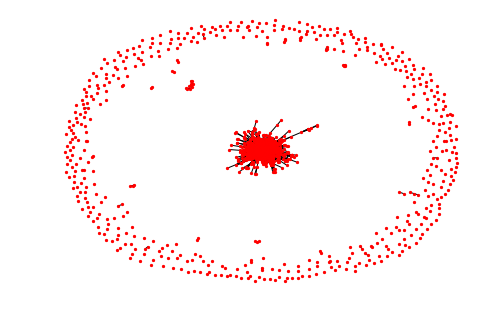

<Figure size 21600x21600 with 0 Axes>

In [36]:
%matplotlib inline

# Draw your network
pos = nx.spring_layout(G_repo)
#betCent = nx.betweenness_centrality(G_large, normalized=True, endpoints=True)
#node_color = [2000.0 * G_large.degree(v) for v in G_large]
node_size = 5 #[v * 100000 for v in betCent.values()]
nx.draw(G_repo, pos=pos, with_labels=False,
                 #node_color=node_color,
                 node_size=node_size )
plt.figure(figsize=(300,300))

In [272]:
from operator import itemgetter

pageR = nx.pagerank(G_repo)
# sort Closness Centrality
clos_sorted = sorted(pageR.items(), key=itemgetter(1), reverse = True)
clos_centr = pd.DataFrame(clos_sorted, columns=['Repository','score'])

print("Page Rank Centrality")
clos_centr.head()

Page Rank Centrality


,Repository,score
0,josephmisiti/awesome-machine-learning,0.009675
1,keras-team/keras,0.007457
2,scikit-learn/scikit-learn,0.005694
3,fastai/fastai,0.005601
4,huggingface/transformers,0.005430


In [ ]:
pageR = nx.pagerank(G_user)
# sort Closness Centrality
clos_sorted = sorted(pageR.items(), key=itemgetter(1), reverse = True)
clos_centr = pd.DataFrame(clos_sorted, columns=['User','score'])

print("Page Rank Centrality")
clos_centr.head()

In [ ]:
from stellargraph.data import BiasedRandomWalk
from stellargraph import StellarGraph

rw = BiasedRandomWalk(StellarGraph(G_repo))

walks = rw.run(
    nodes=list(G_repo.nodes()), # root nodes
    length=100,  # maximum length of a random walk
    n=10,        # number of random walks per root node 
    p=0.5,       # Defines (unormalised) probability, 1/p, of returning to source node
    q=2.0        # Defines (unormalised) probability, 1/q, for moving away from source node
)
print("Number of random walks: {}".format(len(walks)))

In [ ]:
from gensim.models import Word2Vec

model = Word2Vec(walks, size=64, window=5, min_count=0, sg=1, workers=2, iter=1)

In [ ]:
# Retrieve node embeddings and corresponding subjects
node_ids = model.wv.index2word  # list of node IDs 
node_embeddings = model.wv.vectors  # numpy.ndarray of size number of nodes times embeddings dimensionality

In [ ]:
def get_recomandation(user):
    repos = list(set(B.neighbors(user)))
    intel = [dict(model.similar_by_word(repo,topn=1902)) for repo in repos ]
    for i in range(1,len(intel)):
        del intel[0][repos[i]]
    dd = dict()
    for k in intel[0].keys():
        score = 0
        for r in range(len(intel)):
            score = score + intel[r][k]
        dd[k] = score/len(intel)
    a = sorted(dd.items(), key=lambda x: x[1], reverse=True)    
    return a

In [ ]:
rec = get_recomandation('cclauss')